<a href="https://colab.research.google.com/github/JohnTaco93/IMS_training/blob/main/ex9_2_ARMA_john.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#%% Change to the root directory
# Example:
#os.chdir("C:/Users/Desktop/LAMDATA")
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
cd /content/gdrive/My Drive/colab taco/IMS_training/Exercise9_python_Trainee

/content/gdrive/My Drive/colab taco/IMS_training/Exercise9_python_Trainee


In [13]:
pip install lmfit

In [14]:
pip install git+https://github.com/madrury/py-glm.git

  Cloning https://github.com/madrury/py-glm.git to /tmp/pip-req-build-h6ju5p4d
  Running command git clone -q https://github.com/madrury/py-glm.git /tmp/pip-req-build-h6ju5p4d
  Created wheel for py-glm: filename=py_glm-0.0.1-cp36-none-any.whl size=16020 sha256=9c19097cd8f87e7cceec2af6fd7f3945f0c256d11cb0ec216b78d2f77b4f737d
  Stored in directory: /tmp/pip-ephem-wheel-cache-d6f4svkt/wheels/ba/f8/77/41a1cc9756ab50434bbadffdf60a20742fc01bfd5ea3e056eb
Successfully built py-glm


Text(0.5, 1.0, 'Unit 51')

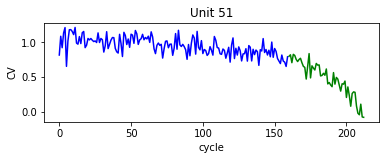

In [15]:
#%% IMS TRAINING -- MINI PROJECT
#%% Exercise 9.2: Prediction of Enginer Health Using ARMA Model

# import the required libraries
import numpy as np
import statistics
import matplotlib.pyplot as plt
from functions import forecastARMA, lr
import warnings
warnings.filterwarnings('ignore')

#%% Initialization & data loading

d=[]
for line in open('train_FD001.txt'):
    tmp = line.split(' ')
    del tmp[-1]
    del tmp[-1]
    d.append(np.cast['float64'](tmp))
RawData = np.array(d)

#%% health assessment
#extract early life and end life data
# sensor data from column 6 to column 26

EarlyLife = np.zeros((0,21))
EndLife = np.zeros((0,21))
for i in range(1,51): # use the first 50 units only
    F = RawData[:,0]==i
    UnitData = RawData[F,:]
    EarlyLife = np.append(EarlyLife,UnitData[0:5,5:],axis=0)
    EndLife = np.append(EndLife,UnitData[-5:,5:],axis=0)
    

PreSelect = np.array([1,2,3,7,8,10,12,13,16])
normal = EarlyLife[:, PreSelect]
faulty = EndLife[:, PreSelect]

PCA_cutoff = 0.95

# compute threshold of failure
threshold = statistics.median(lr(normal,faulty,faulty,PCA_cutoff))

#%% LR evaluation & prediction
# predict at the 3/4 of life
i=51
F = RawData[:,0]==i
UnitData = RawData[F,:]
test_data = UnitData[:, PreSelect+5]

cv = lr(normal,faulty,test_data,PCA_cutoff)
current = round(len(cv)*3/4)

cv1 = cv[0:current]
cv2 = cv[current:]

plt.subplot(2,1,1)
plt.plot(cv1, 'b')
plt.plot(np.array(range(current,len(cv))).T, cv2, 'g')
plt.xlabel('cycle')
plt.ylabel('CV')
plt.title('Unit{p: 0.0f}'.format(p=i))



In [16]:
k = len(cv2) + 50 # k step ahead

training_data = np.array([1 - cv1]).T

#Predicted the future health trend using the 'forecastARMA' function 
# for this dataset, set q=1
# ================= Your Code Here ====================
p=3
q=1
phi,theta,fcast,ssr = forecastARMA(training_data,p,q,ahead=k)

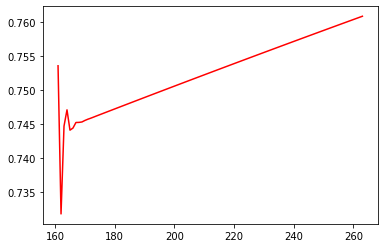

In [17]:
fcast = 1 - fcast

plt.plot(np.array(range(current+1,current+k+1)).T, fcast, 'r')

Text(0, 0.5, 'CV')

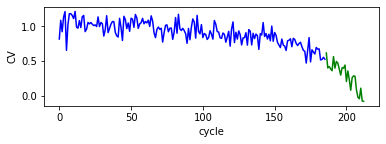

In [18]:
err1 = np.square(cv2 - fcast[0:len(cv2)]).mean(axis=0)
# predict at the 7/8 of life
current = round(len(cv)*7/8)

cv1 = cv[0:current]
cv2 = cv[current:]

plt.subplot(2,1,2)
plt.plot(cv1, 'b')
plt.plot(np.array(range(current,len(cv))).T, cv2, 'g')
plt.xlabel('cycle')
plt.ylabel('CV')



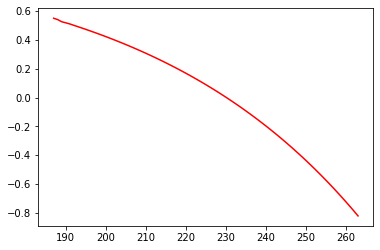

In [19]:
k = len(cv2) + 50

training_data = np.array([1 - cv1]).T

#Predicted the future health trend using the 'forecastARMA' function 
# for this dataset, set q=1
# ================= Your Code Here ====================
p=3
q=1
phi,theta,fcast,ssr = forecastARMA(training_data,p,q,ahead=k)
# =====================================================

fcast = 1 - fcast

plt.plot(np.array(range(current+1,current+k+1)).T, fcast, 'r')

In [20]:
err2 = np.square(cv2 - fcast[0:len(cv2)]).mean(axis=0)

MSE_str = {'predict_at_the_3_4_of_life':err1 ,'predict_at_the_7_8_of_life':err2}